In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the latitudes and the longitudes to a list
coordinates = list(lat_lngs)
coordinates

[(-13.947791012862652, -65.10130412722528),
 (50.81044234961033, -51.574839043016794),
 (23.662764083711423, -154.63552449082516),
 (-34.64528036167374, 41.93726263148045),
 (-45.09256662764239, 133.79662210697796),
 (-10.445567653545652, -6.536849232643306),
 (-56.67178930725424, -119.01983786437934),
 (-7.766054221507915, 99.55027171379686),
 (-27.46405226665029, 51.668734438771764),
 (-2.986619582750407, 1.8877837813756173),
 (32.0140099547241, 88.67730139623416),
 (62.59447026372854, -158.46743224917967),
 (80.81663539274942, 13.586611796350297),
 (-49.00334755130984, -17.441377893280418),
 (53.28836870843821, 91.04820277599106),
 (-86.54147257998002, -131.4004554329524),
 (-46.97277706160256, 37.554519215815134),
 (69.63176782256619, -23.095785121975013),
 (58.45427521540145, 16.835616139187437),
 (-72.64986321625389, 172.44282218822076),
 (49.28605537511814, -45.70494424550441),
 (47.81576239449558, -35.15593510414641),
 (74.715575290294, 174.74750110048245),
 (88.21807153767841,

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
cities

['san ramon',
 'bonavista',
 'kahului',
 'beloha',
 'mount gambier',
 'jamestown',
 'rikitea',
 'bengkulu',
 'taolanaro',
 'port-gentil',
 'lasa',
 'bethel',
 'barentsburg',
 'beya',
 'east london',
 'illoqqortoormiut',
 'nykoping',
 'bluff',
 'torbay',
 'ribeira grande',
 'komsomolskiy',
 'berlevag',
 'mataura',
 'lorengau',
 'bredasdorp',
 'cape town',
 'punta arenas',
 'sentyabrskiy',
 'tuktoyaktuk',
 'namibe',
 'killarney',
 'ahipara',
 'butaritari',
 'bilibino',
 'carnarvon',
 'laguna',
 'dikson',
 'vaini',
 'katherine',
 'naigarhi',
 'nizhneyansk',
 'banda aceh',
 'albany',
 'riberalta',
 'bambous virieux',
 'hailey',
 'yulara',
 'kaitangata',
 'cidreira',
 'belushya guba',
 'carahue',
 'provideniya',
 'kapaa',
 'port alfred',
 'lompoc',
 'sisimiut',
 'hithadhoo',
 'moose factory',
 'nikolskoye',
 'constitucion',
 'antoing',
 'samusu',
 'loxstedt',
 'busselton',
 'severo-kurilsk',
 'mandalgovi',
 'kaeo',
 'madang',
 'padang',
 'semey',
 'ko samui',
 'aleksandrovskiy zavod',
 'ita

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=925abcdd3f28ca03738c6335a017c6dd


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    print("for loop started")
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        weather_description = city_weather["weather"][0]["description"]
        
        try:
            rain_inches = city_weather["rain"]["3h"]
        except:
            rain_inches = ("0")
            pass
        try:
            snow_inches = city_weather["snow"]["3h"]
        except:
            snow_inches = ("0")  
            pass
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Current Description": weather_description,
                          "Rain inches (last 3 hours)": rain_inches,
                          "Snow inches (last 3 hours)": snow_inches})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
for loop started
Processing Record 1 of Set 1 | san ramon
for loop started
Processing Record 2 of Set 1 | bonavista
for loop started
Processing Record 3 of Set 1 | kahului
for loop started
Processing Record 4 of Set 1 | beloha
for loop started
Processing Record 5 of Set 1 | mount gambier
for loop started
Processing Record 6 of Set 1 | jamestown
for loop started
Processing Record 7 of Set 1 | rikitea
for loop started
Processing Record 8 of Set 1 | bengkulu
for loop started
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
for loop started
Processing Record 10 of Set 1 | port-gentil
for loop started
Processing Record 11 of Set 1 | lasa
for loop started
Processing Record 12 of Set 1 | bethel
for loop started
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
for loop started
Processing Record 14 of Set 1 | beya
for loop started
Processing Record 15 of Set 1 | east london
for loop started
Pr

for loop started
Processing Record 35 of Set 3 | kruisfontein
for loop started
Processing Record 36 of Set 3 | shache
for loop started
Processing Record 37 of Set 3 | juneau
for loop started
Processing Record 38 of Set 3 | vaitupu
City not found. Skipping...
for loop started
Processing Record 39 of Set 3 | marzuq
for loop started
Processing Record 40 of Set 3 | bahia honda
for loop started
Processing Record 41 of Set 3 | ponta delgada
for loop started
Processing Record 42 of Set 3 | sharjah
for loop started
Processing Record 43 of Set 3 | menomonie
for loop started
Processing Record 44 of Set 3 | anloga
for loop started
Processing Record 45 of Set 3 | te anau
for loop started
Processing Record 46 of Set 3 | mumford
for loop started
Processing Record 47 of Set 3 | pemangkat
for loop started
Processing Record 48 of Set 3 | bathsheba
for loop started
Processing Record 49 of Set 3 | narsaq
for loop started
Processing Record 50 of Set 3 | cayenne
for loop started
Processing Record 1 of Set 

for loop started
Processing Record 19 of Set 6 | warwick
for loop started
Processing Record 20 of Set 6 | alexandria
for loop started
Processing Record 21 of Set 6 | katsuura
for loop started
Processing Record 22 of Set 6 | benguela
for loop started
Processing Record 23 of Set 6 | alibag
for loop started
Processing Record 24 of Set 6 | sabang
for loop started
Processing Record 25 of Set 6 | dingle
for loop started
Processing Record 26 of Set 6 | kununurra
for loop started
Processing Record 27 of Set 6 | mys shmidta
City not found. Skipping...
for loop started
Processing Record 28 of Set 6 | krasnoselkup
for loop started
Processing Record 29 of Set 6 | vila velha
for loop started
Processing Record 30 of Set 6 | kyra
for loop started
Processing Record 31 of Set 6 | gallipoli
for loop started
Processing Record 32 of Set 6 | itoman
for loop started
Processing Record 33 of Set 6 | fort nelson
for loop started
Processing Record 34 of Set 6 | mahebourg
for loop started
Processing Record 35 of

City not found. Skipping...
for loop started
Processing Record 6 of Set 9 | oume
for loop started
Processing Record 7 of Set 9 | wewak
for loop started
Processing Record 8 of Set 9 | kloulklubed
for loop started
Processing Record 9 of Set 9 | bangassou
for loop started
Processing Record 10 of Set 9 | jutai
for loop started
Processing Record 11 of Set 9 | stabat
for loop started
Processing Record 12 of Set 9 | taoudenni
for loop started
Processing Record 13 of Set 9 | chokwe
for loop started
Processing Record 14 of Set 9 | bandarbeyla
for loop started
Processing Record 15 of Set 9 | shelburne
for loop started
Processing Record 16 of Set 9 | coquimbo
for loop started
Processing Record 17 of Set 9 | cockburn town
for loop started
Processing Record 18 of Set 9 | usakos
for loop started
Processing Record 19 of Set 9 | bongandanga
for loop started
Processing Record 20 of Set 9 | ginda
for loop started
Processing Record 21 of Set 9 | praia da vitoria
for loop started
Processing Record 22 of S

for loop started
Processing Record 41 of Set 11 | hyeres
for loop started
Processing Record 42 of Set 11 | buchanan
for loop started
Processing Record 43 of Set 11 | sawakin
for loop started
Processing Record 44 of Set 11 | guarda
for loop started
Processing Record 45 of Set 11 | jahazpur
for loop started
Processing Record 46 of Set 11 | port hawkesbury
for loop started
Processing Record 47 of Set 11 | roald
for loop started
Processing Record 48 of Set 11 | huinan
for loop started
Processing Record 49 of Set 11 | bobo dioulasso
for loop started
Processing Record 50 of Set 11 | baykit
for loop started
Processing Record 1 of Set 12 | lakatoro
for loop started
Processing Record 2 of Set 12 | klamath falls
for loop started
Processing Record 3 of Set 12 | port moresby
for loop started
Processing Record 4 of Set 12 | teguldet
for loop started
Processing Record 5 of Set 12 | moussoro
for loop started
Processing Record 6 of Set 12 | khonuu
City not found. Skipping...
for loop started
Processin

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Rain inches (last 3 hours),Snow inches (last 3 hours)
0,San Ramon,US,2022-11-25 03:42:06,37.7799,-121.9780,61.25,57,0,6.91,clear sky,0,0
1,Bonavista,CA,2022-11-25 03:46:27,48.6499,-53.1147,28.71,94,100,30.58,snow,0,0
2,Kahului,US,2022-11-25 03:46:28,20.8947,-156.4700,75.22,70,75,23.02,broken clouds,0,0
3,Beloha,MG,2022-11-25 03:46:29,-25.1667,45.0500,77.88,61,2,4.05,clear sky,0,0
4,Mount Gambier,AU,2022-11-25 03:46:29,-37.8333,140.7667,73.60,44,95,1.72,overcast clouds,0,0
5,Jamestown,US,2022-11-25 03:45:54,42.0970,-79.2353,47.79,52,100,6.91,overcast clouds,0,0
6,Rikitea,PF,2022-11-25 03:46:30,-23.1203,-134.9692,70.43,86,100,8.95,light rain,0,0
7,Bengkulu,ID,2022-11-25 03:46:31,-3.8004,102.2655,77.32,89,97,8.46,light rain,0,0
8,Port-Gentil,GA,2022-11-25 03:46:31,-0.7193,8.7815,76.37,91,100,7.34,light rain,0,0
9,Lasa,IT,2022-11-25 03:46:32,46.6166,10.7002,38.28,57,100,2.06,overcast clouds,0,0


In [40]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1669447513.610332

In [14]:
today = time.strftime("%x")
today

'11/25/22'

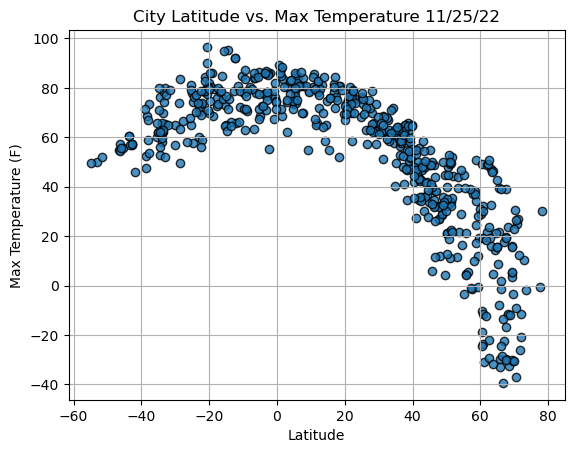

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

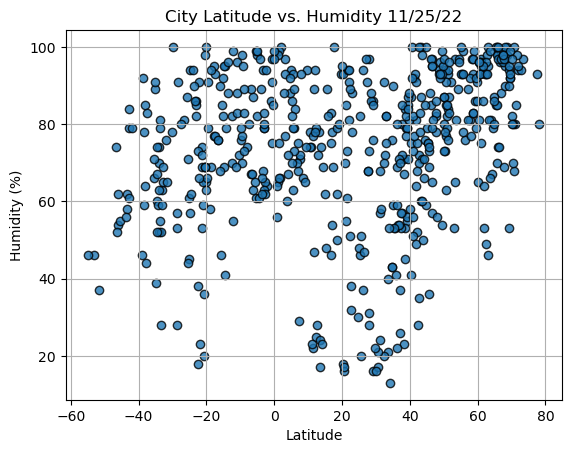

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

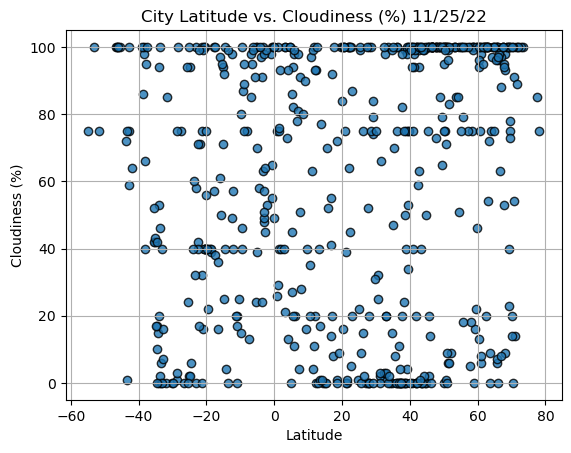

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

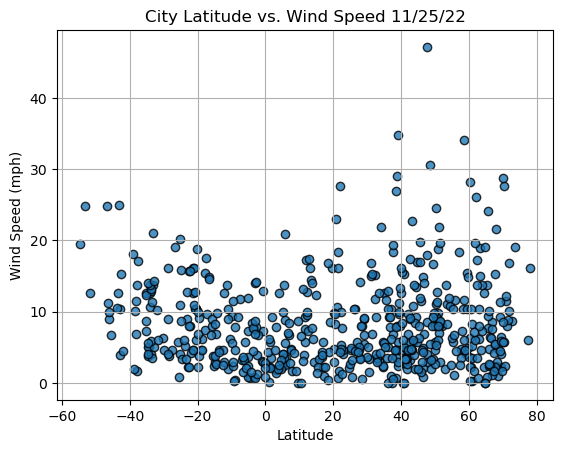

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                                     Nykoping
Country                                        SE
Date                          2022-11-25 03:46:34
Lat                                        58.753
Lng                                       17.0079
Max Temp                                    34.09
Humidity                                       93
Cloudiness                                    100
Wind Speed                                   4.61
Current Description               overcast clouds
Rain inches (last 3 hours)                      0
Snow inches (last 3 hours)                      0
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
553    False
554     True
555    False
556     True
557     True
Name: Lat, Length: 558, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Rain inches (last 3 hours),Snow inches (last 3 hours)
0,San Ramon,US,2022-11-25 03:42:06,37.7799,-121.9780,61.25,57,0,6.91,clear sky,0,0
1,Bonavista,CA,2022-11-25 03:46:27,48.6499,-53.1147,28.71,94,100,30.58,snow,0,0
2,Kahului,US,2022-11-25 03:46:28,20.8947,-156.4700,75.22,70,75,23.02,broken clouds,0,0
5,Jamestown,US,2022-11-25 03:45:54,42.0970,-79.2353,47.79,52,100,6.91,overcast clouds,0,0
9,Lasa,IT,2022-11-25 03:46:32,46.6166,10.7002,38.28,57,100,2.06,overcast clouds,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
551,Sendafa,ET,2022-11-25 03:50:40,9.1500,39.0333,54.75,65,90,1.74,overcast clouds,0,0
552,Goderich,CA,2022-11-25 03:50:41,43.7501,-81.7165,50.32,50,99,13.80,overcast clouds,0,0
554,Santona,ES,2022-11-25 03:50:42,43.4439,-3.4576,54.32,87,100,10.85,light rain,0,0
556,Pitkyaranta,RU,2022-11-25 03:50:43,61.5734,31.4792,18.23,86,95,7.20,overcast clouds,0,0


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Current Description,Rain inches (last 3 hours),Snow inches (last 3 hours)
0,San Ramon,US,2022-11-25 03:42:06,37.7799,-121.9780,61.25,57,0,6.91,clear sky,0,0
1,Bonavista,CA,2022-11-25 03:46:27,48.6499,-53.1147,28.71,94,100,30.58,snow,0,0
2,Kahului,US,2022-11-25 03:46:28,20.8947,-156.4700,75.22,70,75,23.02,broken clouds,0,0
5,Jamestown,US,2022-11-25 03:45:54,42.0970,-79.2353,47.79,52,100,6.91,overcast clouds,0,0
9,Lasa,IT,2022-11-25 03:46:32,46.6166,10.7002,38.28,57,100,2.06,overcast clouds,0,0


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

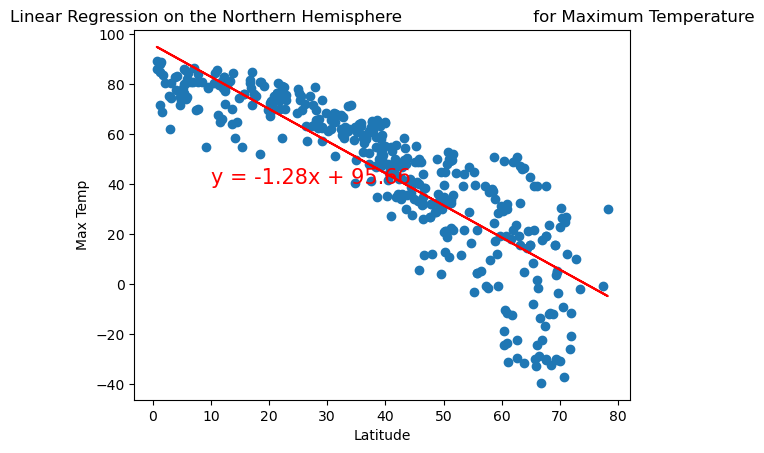

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

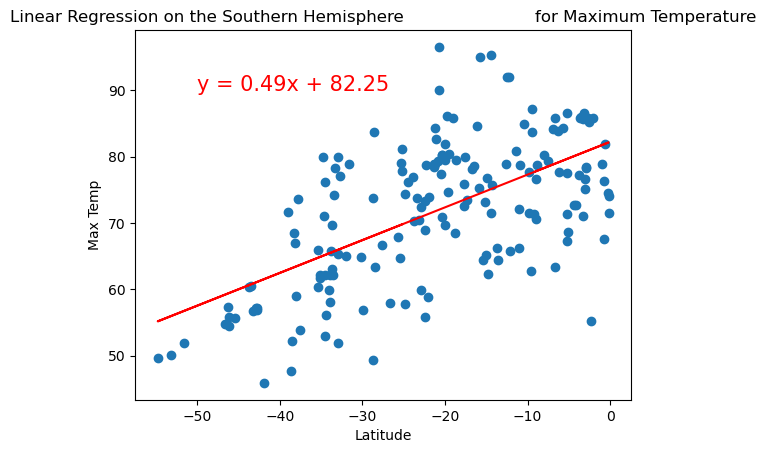

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

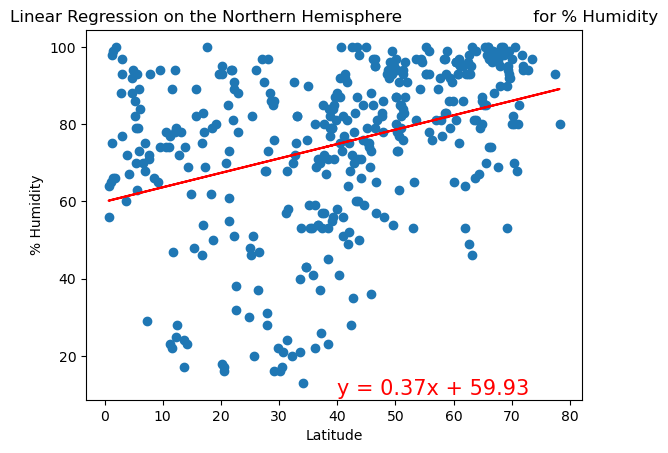

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

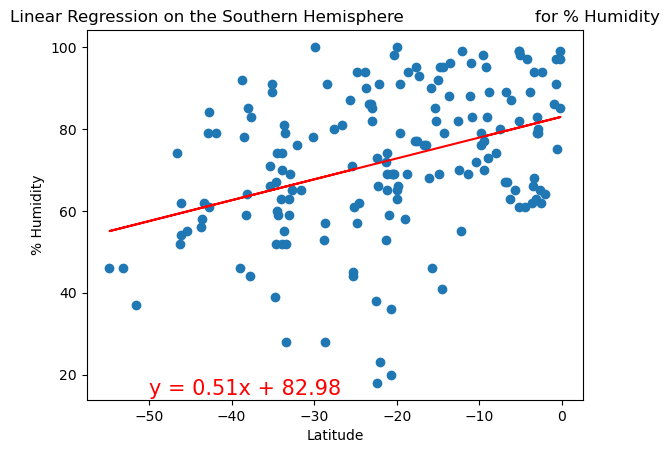

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

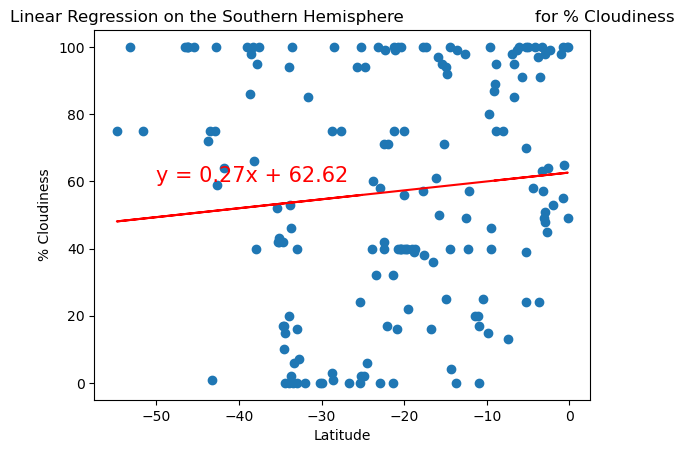

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

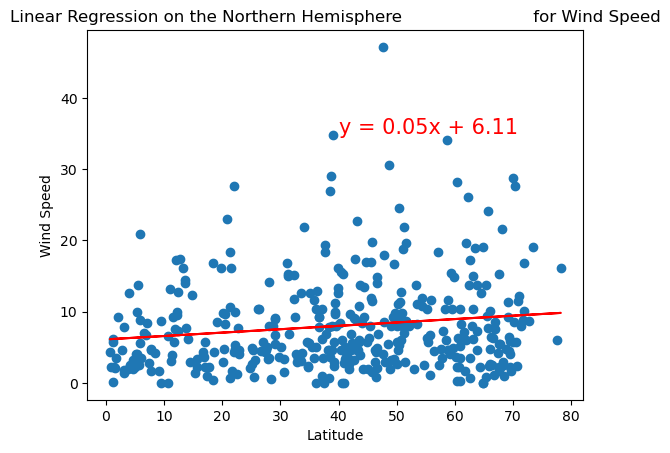

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

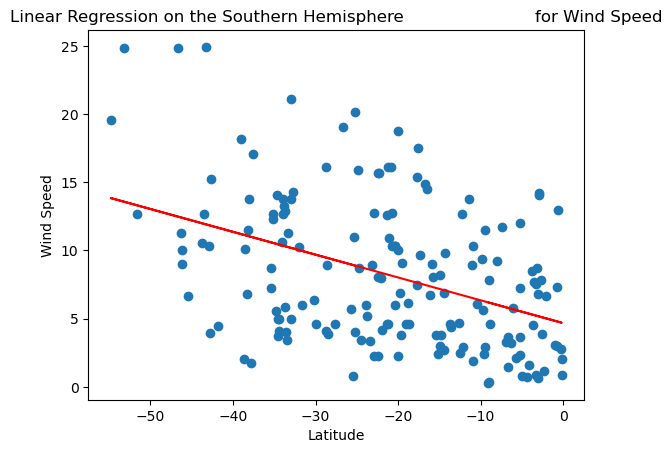

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))